# 9.1. Artificial Neural Networks 🧠

## Build an ANN from scratch for a classification problem
+ Architecture of  feed-forward network


![Feed_forward_network](FFNN.png)

Feed-forward for a network with 1 hidden layer:

$$\hat{y} = \sigma^{out}[\sigma^{hidden}(X^{in} \cdot w^{in} + bias^{in} * w^{in}_0)\: \cdot \: w^{out} + bias^{out} * w^{out}_0 ]$$

+ $\sigma$:
    + activation function
+ $X \cdot w$:
    + dot product: $x_{1}*w_{1} + x_{2}*w_{2}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
plt.rcParams['figure.figsize']=(8,6)

### Step 1: Create training data

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 50, noise = 0.2, random_state= 42)

### Step 2: Check shape

In [3]:
X.shape, y.shape

((50, 2), (50,))

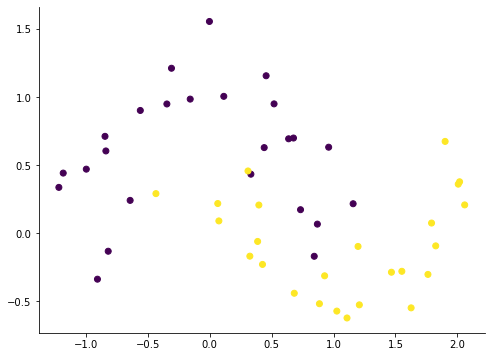

In [4]:
# Make a scatterplot of the 2 columns of X
# Color the data points according to the labels y
plt.scatter(X[:,0],X[:,1],c=y)
sns.despine()

> We can't draw a linear boundary between the blue and yellow dots. FFN allows us to draw a non-linear boundary.

### Step 3: Add a bias (parameter b) column to X

To apply the feed-forward function we need:
+ add bias to the input (aka add a third column of '1' to X)
+ randomly generate weights for input layer and output layer

#### Add bias to X

In [20]:
X

array([[-0.15856989,  0.98480618],
       [ 1.10900374, -0.62160223],
       [ 0.39641523,  0.20740869],
       [ 1.79239122,  0.07511293],
       [-0.84739307,  0.71154296],
       [ 1.90209657,  0.67432213],
       [ 0.0731551 ,  0.09079042],
       [-0.43566685,  0.29122072],
       [ 0.42577731, -0.22851359],
       [-0.64418143,  0.24144478],
       [ 0.11289285,  1.00510013],
       [ 0.96066405,  0.63183812],
       [ 1.46814927, -0.28580296],
       [ 0.5192833 ,  0.94984582],
       [ 0.73327397,  0.17310931],
       [ 0.33197143,  0.43375035],
       [ 1.62726102, -0.54736954],
       [ 2.01908805,  0.37804882],
       [ 2.00824323,  0.36058988],
       [-0.56195047,  0.90148197],
       [ 0.67647169,  0.69909987],
       [-0.30999892,  1.2113287 ],
       [-0.90842298, -0.33685748],
       [ 0.68268561, -0.44010332],
       [ 0.38645217, -0.05988231],
       [ 0.84405962, -0.16877927],
       [ 1.76324657, -0.30187296],
       [ 0.06417199,  0.2184967 ],
       [ 1.02670564,

In [6]:
def add_ones(X):
    """ It returns the input-NumPy array X with an additional column of ones
    Parameter
    *********
    X: numpy array 
   
    return X_with_ones """
     # Create an array of 1 with same number of rows as X
    ones = np.ones(shape=(X.shape[0],1))
     #add ones to X
    X_with_ones = np.hstack((X,ones))
    return X_with_ones
   
    

In [7]:
X_with_ones = add_ones(X)  #add bias

In [9]:
X_with_ones.shape

(50, 3)

#### Weights
Mapping of Input layer --> Hidden layer:
+ w_in shape 3x2 to map (2 neurons + bias)   to 2 hidden neurons 

Mapping of Hidden layer --> Output layer:
+ w_out shape 3x1 to map (2 neurons + bias) to 1 output neuron

![Feed_forward_network](FFNN.png)

**Initialize the network with random weights**

In [10]:
# Random Input weights
w_in = np.random.normal(size=(3,2))    # ---> rand return random within [0, 1)

In [11]:
w_in

array([[0.5457815 , 0.14218175],
       [1.67826312, 1.20338218],
       [1.3978774 , 0.14667048]])

In [12]:
# Random output weights
w_out = np.random.normal(size=(3,1))


In [14]:
w_out

array([[-1.18126092],
       [-0.69564679],
       [ 1.47526539]])

In [13]:
# Check the shapes
w_in.shape, w_out.shape

((3, 2), (3, 1))

### Step 4:  Define activation function

- Sigmoid function:
$s =  \frac{\mathrm{1} }{\mathrm{1} + e^-z } $

In [15]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [16]:
##### Test if you have the correct function with following code
a = np.array([-10.0, -1.0, 0.0, 1.0])
expected = np.array([0.0, 0.27, 0.5, 0.73])
assert np.all(sigmoid(a).round(2) == expected)

Text(0, 0.5, 'Activation function sigmoid')

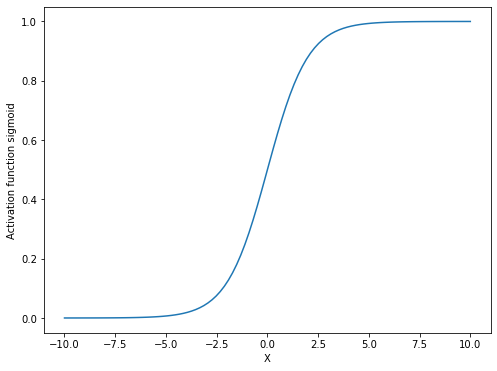

In [19]:
z = np.linspace(-10,10,100)
#plt.plot(0,0.5,marker='o')
plt.plot(z,sigmoid(z))
plt.xlabel('X')
plt.ylabel('Activation function sigmoid')

### Step 5: Connect all the pieces and "build" the network!

### Fill in exercise!

In [23]:
def feed_forward(X, w_in, w_out):

    """
    1. Step 1: Calculate the dot product of X
       and the weights of the first layer.

    2. Step 2: Apply the sigmoid function on the result of Step 1.

    3. Step 3: Append an extra column of ones to the result (i.e. the bias).

    4. Step 4: Calculate the dot product of the previous step
       with the weights of the second (i.e. outer) layer.

    5. Step 5: Apply the sigmoid function on the result.

    6. Step 6: Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    # 1. HL_in
    HL_in = np.dot(X_with_ones, w_in) #remember X already contains the bias
    print(f'Shape of HL_in = {HL_in.shape}')
    #print('HL_in')
  
    
    # 2. _out
    output_1 = sigmoid(HL_in)
    #print('HL_out')
    #print(output_1)
    
    # 3. add bias
    HL_out = add_ones(output_1)
    #print('H_out with bias')

    
    # 4. O_in
    O_in = np.dot(HL_out, w_out)
    print(f'Shape of H_out = {O_in.shape}')
  
    
    
    # 5. O_out -> actual prediction
    output_2 = sigmoid(O_in)
    #print('O_out')
    #print(output_2)      
    
    # 6.
    return output_1, output_2

In [24]:
out1, out2 = feed_forward(X, w_in, w_out)

Shape of HL_in = (50, 2)
Shape of H_out = (50, 1)


In [30]:
out2

(50, 1)

### Plot the result

In [25]:
y

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1])

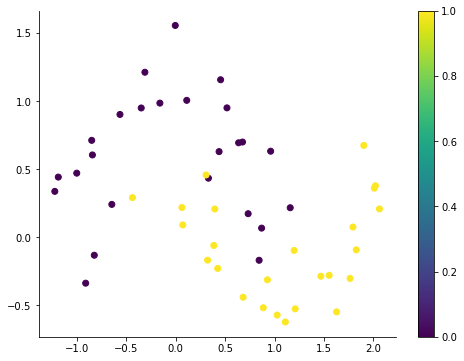

In [26]:
plt.scatter(X[:,0], X[:,1], c = y)
plt.colorbar()
sns.despine()

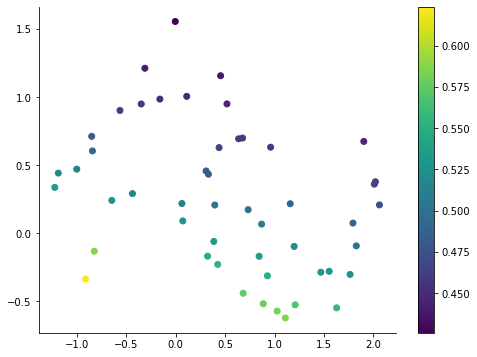

In [27]:
plt.scatter(X[:,0], X[:,1], c = out2)
plt.colorbar()
sns.despine()

### What does this result mean?


### How does the neural network learn?




### What next ? 👀


* Create a virtual enviroment and install TensorFlow and OpenCV.
[See this](https://spiced.space/euclidean-eukalyptus/ds-course/chapters/project_deep_learning/README.html)
* Decide on categories of images you want to build a network to identify, and start collecting images with your webcam. 
[See this](https://spiced.space/euclidean-eukalyptus/ds-course/chapters/project_deep_learning/README.html)
* Watch 3 Blue 1 Brown Neural Network Series 
[3 Blue 1 Brown](https://www.youtube.com/watch?time_continue=2&v=aircAruvnKk&feature=emb_title)